In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### I. Load Data

In [10]:
import os
import pandas as pd

project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_path = os.path.join(project_root, 'data')

users_path = os.path.join(data_path, 'users.dat')
movies_path = os.path.join(data_path, 'movies.dat')
ratings_path = os.path.join(data_path, 'ratings.dat')

users = pd.read_csv(users_path, sep='::', header=None, engine='python', encoding='ISO-8859-1')
movies = pd.read_csv(movies_path, sep='::', header=None, engine='python', encoding='ISO-8859-1')
ratings = pd.read_csv(ratings_path, sep='::', header=None, engine='python', encoding='ISO-8859-1')

In [ ]:
users.columns = ['user_id', 'gender', 'age', 'occupation', 'zip_code']
print(users.head())

   user_id gender  age  occupation zip_code
0        1      F    1          10    48067
1        2      M   56          16    70072
2        3      M   25          15    55117
3        4      M   45           7    02460
4        5      M   25          20    55455


In [16]:
movies.columns = ['movie_id', 'title', 'genres']
print(movies.head())

   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy


In [14]:
ratings.columns = ['user_id', 'movie_id', 'rating', 'timestamp']
print(ratings.head())

   user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291


In [18]:
movies[movies['movie_id'] == 1193]


,movie_id,title,genres
1176,1193,One Flew Over the Cuckoo's Nest (1975),Drama


### II. Preparing the data

In [17]:
# how many?
n_users = users['user_id'].nunique()
n_movies = movies['movie_id'].nunique()
n_genres = movies['genres'].nunique()
print(f"Number of users: {n_users}")
print(f"Number of movies: {n_movies}")
print(f"Number of genres: {n_genres}")

Number of users: 6040
Number of movies: 3883
Number of genres: 301


#### Matrix of Users and Features

In [23]:
data = ratings.drop('timestamp', axis=1)
data.head()

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [ ]:
# Merge demographic info from users into the data
data_with_demographics = data.merge(users[['user_id', 'gender', 'age', 'occupation']], on='user_id', how='left')
data_with_demographics.head()

,user_id,movie_id,rating,gender,age,occupation
0,1,1193,5,F,1,10
1,1,661,3,F,1,10
2,1,914,3,F,1,10
3,1,3408,4,F,1,10
4,1,2355,5,F,1,10


In [26]:
# Merge movies info from movies into the data 
data_with_movies = data_with_demographics.merge(movies[['movie_id', 'genres']], on='movie_id', how='left')
data_with_movies.head()

,user_id,movie_id,rating,gender,age,occupation,genres
0,1,1193,5,F,1,10,Drama
1,1,661,3,F,1,10,Animation|Children's|Musical
2,1,914,3,F,1,10,Musical|Romance
3,1,3408,4,F,1,10,Drama
4,1,2355,5,F,1,10,Animation|Children's|Comedy


#### Quick Data Analysis

<Figure size 1000x600 with 0 Axes>

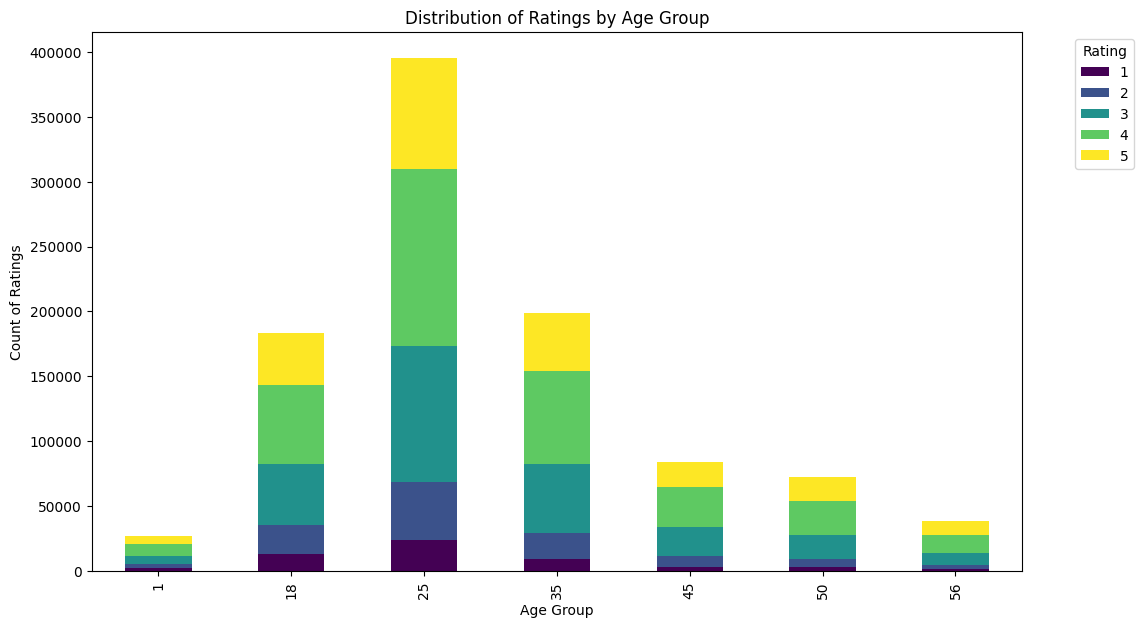

In [ ]:
import matplotlib.pyplot as plt

# Show distribution of rating based on age
plt.figure(figsize=(10,6))
data_with_movies.groupby('age')['rating'].value_counts().unstack().plot(
    kind='bar',
    stacked=True,
    colormap='viridis', 
    figsize=(12,7)
)
plt.title('Distribution of Ratings by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Ratings')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1000x600 with 0 Axes>

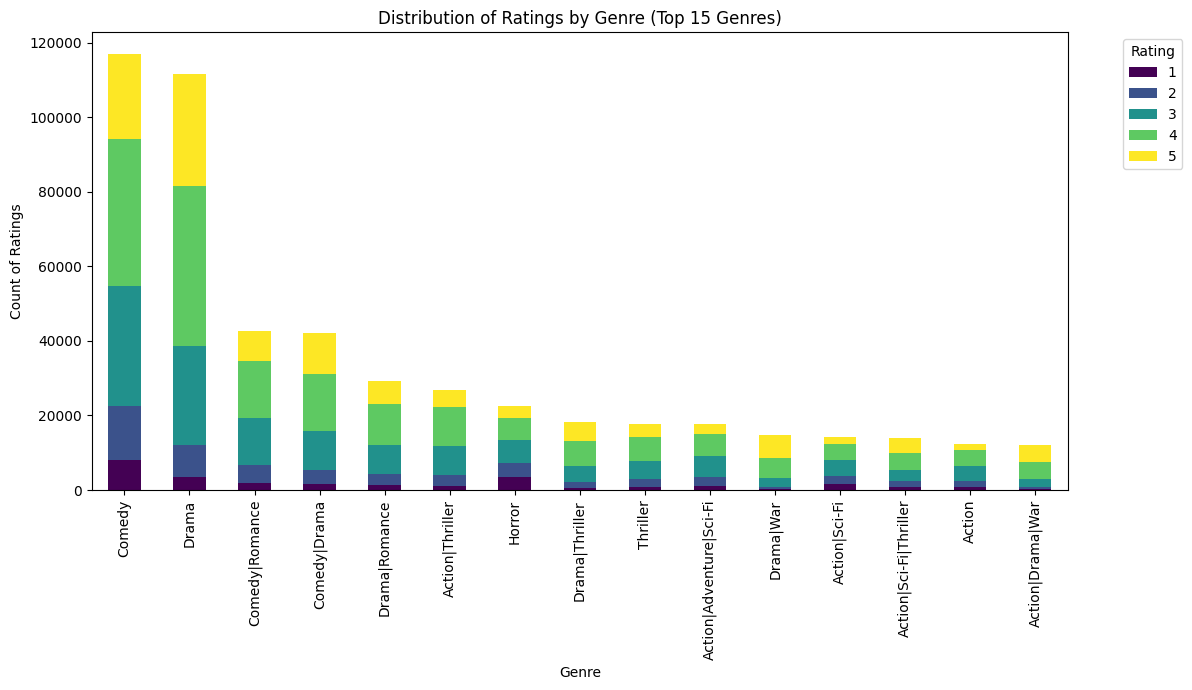

In [31]:
import matplotlib.pyplot as plt

# Show distribution of rating for top 15 genres
top_15_genres = data_with_movies['genres'].value_counts().head(15).index
top15_data = data_with_movies[data_with_movies['genres'].isin(top_15_genres)]

plt.figure(figsize=(10,6))
top15_data.groupby('genres')['rating'].value_counts().unstack().loc[top_15_genres].plot(
    kind='bar', 
    stacked=True, 
    colormap='viridis', 
    figsize=(12,7)
)
plt.title('Distribution of Ratings by Genre (Top 15 Genres)')
plt.xlabel('Genre')
plt.ylabel('Count of Ratings')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()